In [1]:
import csv
import pandas as pd

In [2]:
df = pd.read_csv('mresults.csv')

In [5]:
df[-20:]

,Unnamed: 0,Learning rate,Epochs,Batch size,Num layers,Features list,Transforms,Runtime,Optimizer,Loss function,Training Loss list,Validation Loss list,Training Dice list,Validation Dice list,Test Dice,Test results,Organ
44,44,6.100000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,353.179264,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(28.0920), tensor(27.6333), tensor(27.3...","[tensor(9.6479), tensor(9.5068), tensor(9.4231...","[tensor(0.1281), tensor(0.1381), tensor(0.1439...","[tensor(0.1286), tensor(0.1379), tensor(0.1440...",tensor(0.6685),NaN,lv
45,45,6.600000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,352.902895,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(24.2176), tensor(23.3125), tensor(23.1...","[tensor(8.3320), tensor(8.0257), tensor(7.9672...","[tensor(0.2217), tensor(0.2697), tensor(0.2934...","[tensor(0.2263), tensor(0.2785), tensor(0.3039...",tensor(0.6014),NaN,lv
46,46,7.100000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,352.583430,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(23.2321), tensor(23.0904), tensor(23.0...","[tensor(7.9977), tensor(7.9481), tensor(7.9341...","[tensor(0.2622), tensor(0.2707), tensor(0.3279...","[tensor(0.2695), tensor(0.2802), tensor(0.3481...",tensor(0.6741),NaN,lv
47,47,7.600000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,358.079803,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(23.5974), tensor(23.4934), tensor(23.3...","[tensor(8.1294), tensor(8.0942), tensor(8.0544...","[tensor(0.2332), tensor(0.2773), tensor(0.3066...","[tensor(0.2371), tensor(0.2855), tensor(0.3194...",tensor(0.7050),NaN,lv
48,48,8.100000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,370.011316,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(25.7334), tensor(23.7889), tensor(23.4...","[tensor(8.8600), tensor(8.1957), tensor(8.0688...","[tensor(0.1512), tensor(0.2186), tensor(0.2595...","[tensor(0.1495), tensor(0.2236), tensor(0.2678...",tensor(0.6964),NaN,lv
49,49,8.600000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,370.874085,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(26.4990), tensor(24.6474), tensor(24.2...","[tensor(9.1070), tensor(8.4891), tensor(8.3513...","[tensor(0.1497), tensor(0.2148), tensor(0.2420...","[tensor(0.1511), tensor(0.2200), tensor(0.2494...",tensor(0.6749),NaN,lv
50,50,9.100000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,369.258796,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(23.4953), tensor(23.5145), tensor(23.4...","[tensor(8.0906), tensor(8.0975), tensor(8.0541...","[tensor(0.2398), tensor(0.2722), tensor(0.3046...","[tensor(0.2473), tensor(0.2797), tensor(0.3163...",tensor(0.7282),NaN,lv
51,51,9.600000e-06,30,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,371.257873,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(24.2719), tensor(23.4446), tensor(22.9...","[tensor(8.3546), tensor(8.0718), tensor(7.8928...","[tensor(0.2075), tensor(0.2706), tensor(0.3377...","[tensor(0.2099), tensor(0.2814), tensor(0.3617...",tensor(0.7373),NaN,lv
52,52,5.000000e-07,50,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,746.999125,Adam (\nParameter Group 0\n amsgrad: False\...,BCEWithLogitsLoss(),"[tensor(40.5125), tensor(40.1355), tensor(40.0...","[tensor(13.9269), tensor(13.7937), tensor(13.7...","[tensor(0.0387), tensor(0.0355), tensor(0.0373...","[tensor(0.0376), tensor(0.0342), tensor(0.0361...",tensor(0.2915),NaN,lv
53,53,1.000000e-06,50,12,4,"[64, 128, 256, 512]",Compose(\n <transform.HorizontalFlip object...,610.043360,Adam (\nParameter Group 0\n amsgrad:

In [8]:
df = df.sort_values(by=['Learning rate'])

In [11]:
type(df['Learning rate'])

pandas.core.series.Series

In [9]:
import matplotlib.pyplot as plt
import re

30


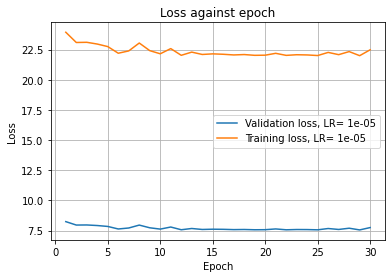

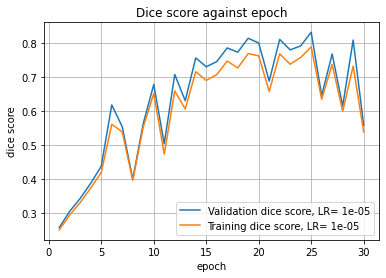

30


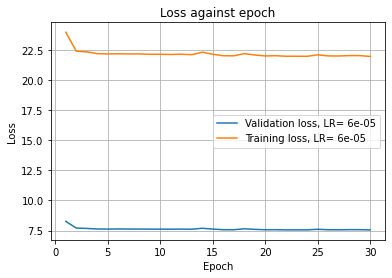

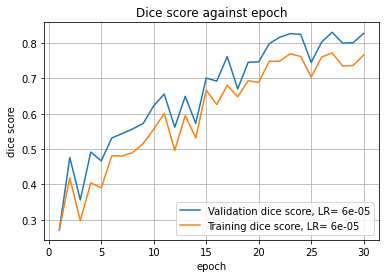

30


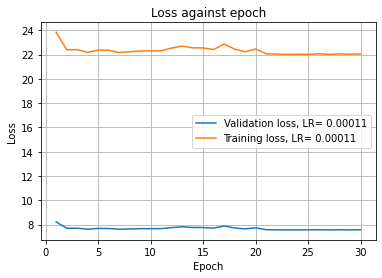

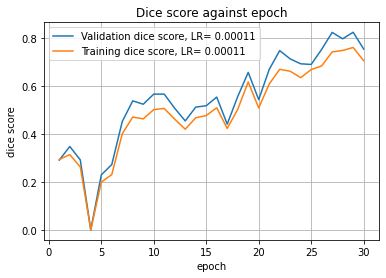

30


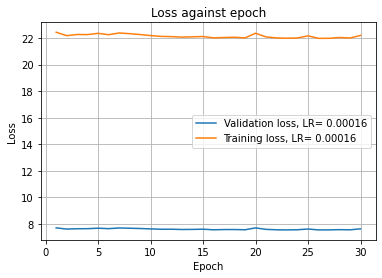

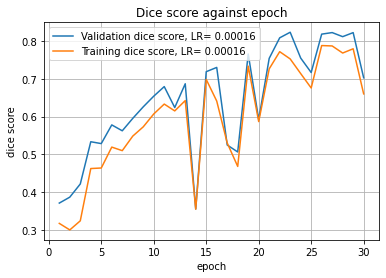

30


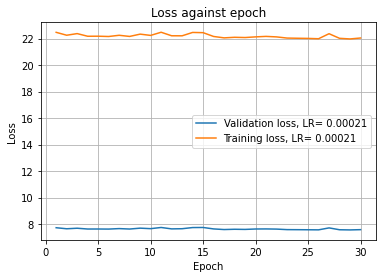

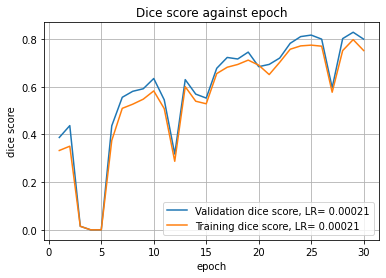

30


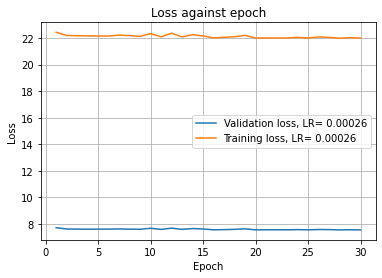

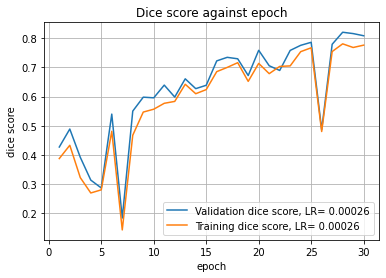

30


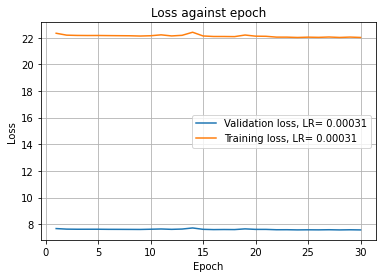

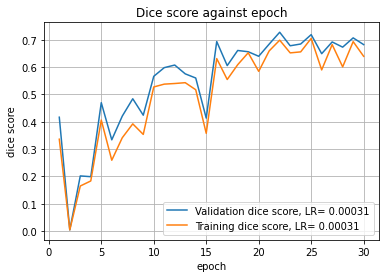

30


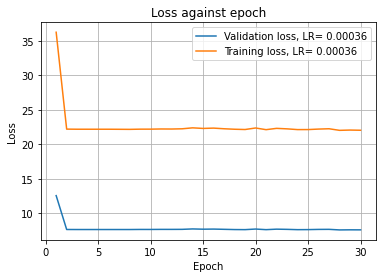

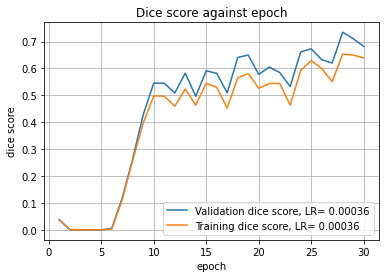

30


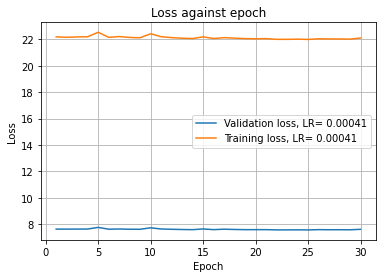

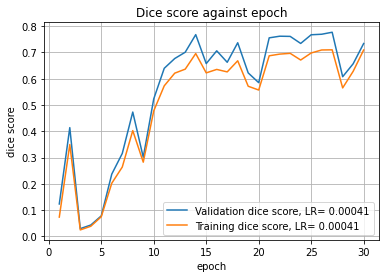

30


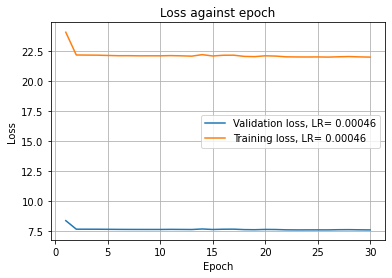

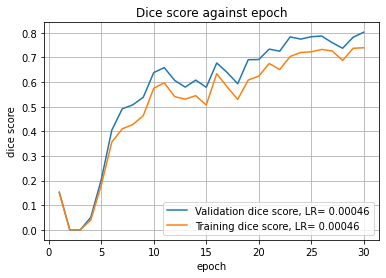

30


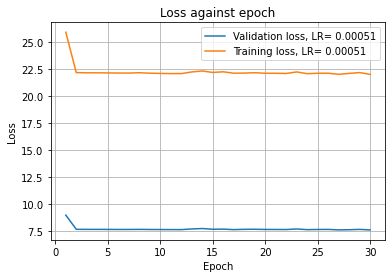

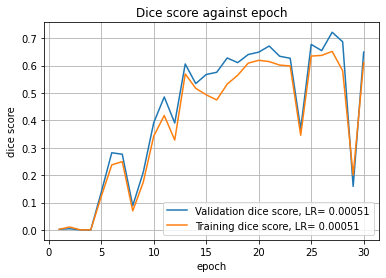

30


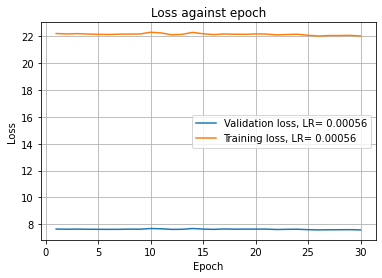

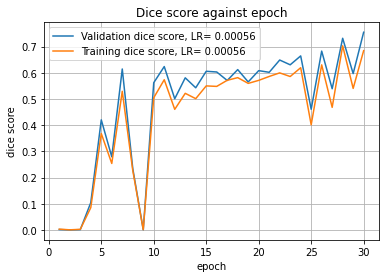

30


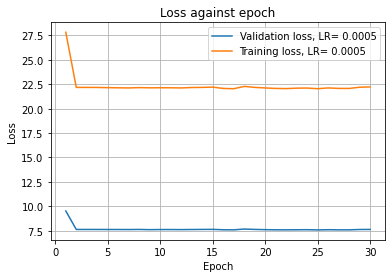

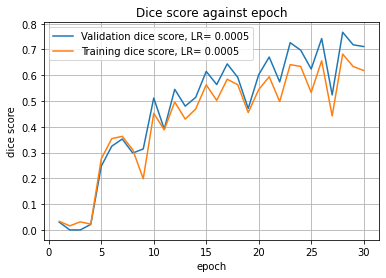

30


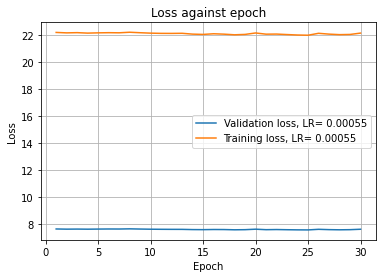

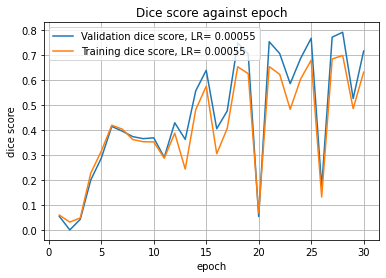

30


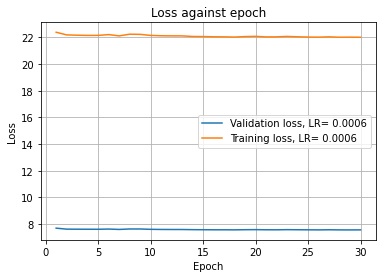

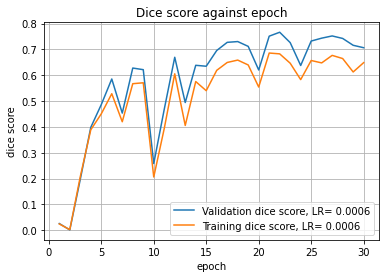

30


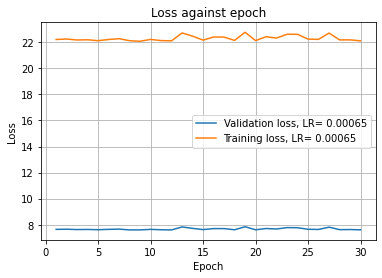

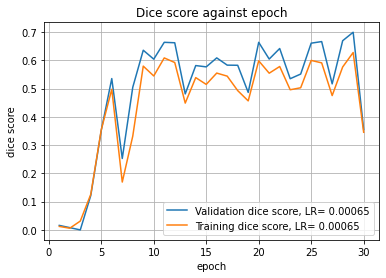

30


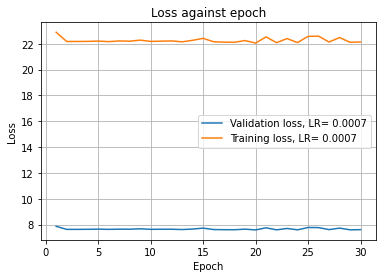

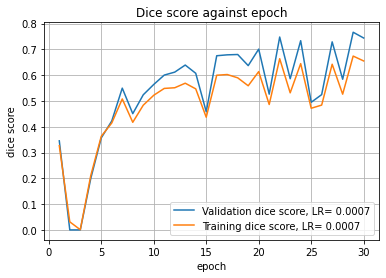

30


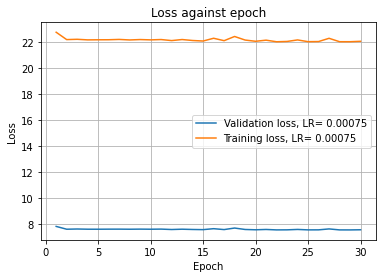

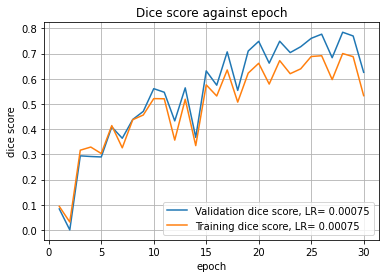

30


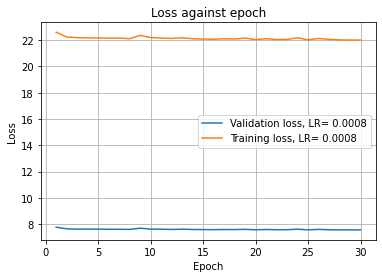

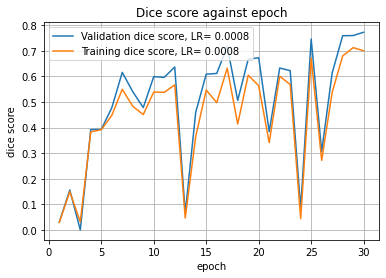

30


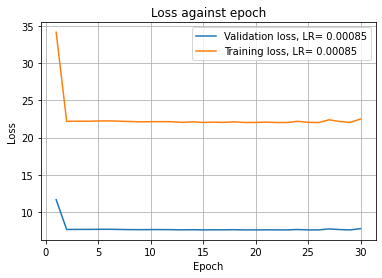

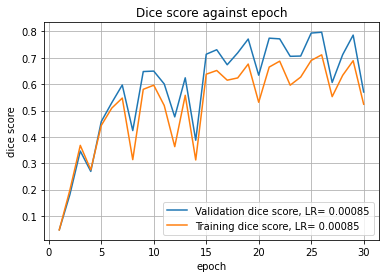

30


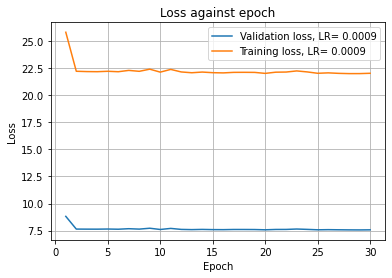

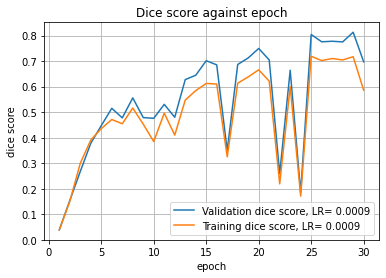

30


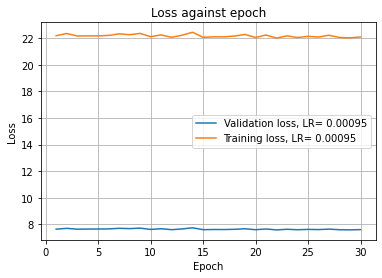

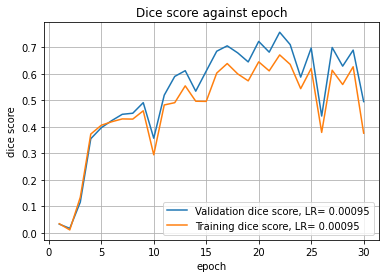

30


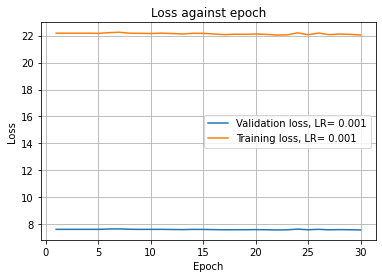

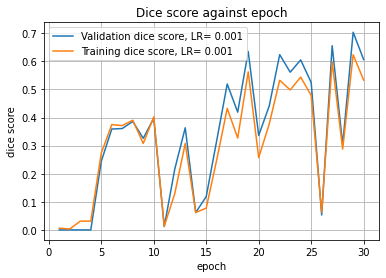

30


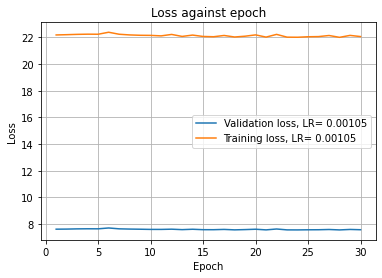

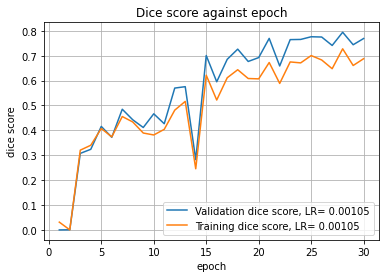

30


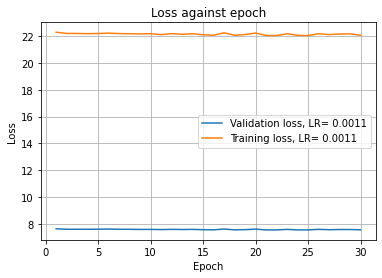

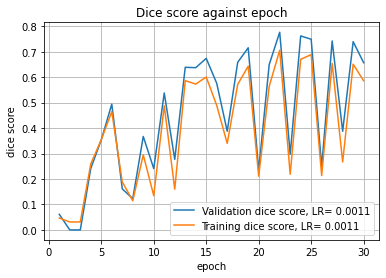

30


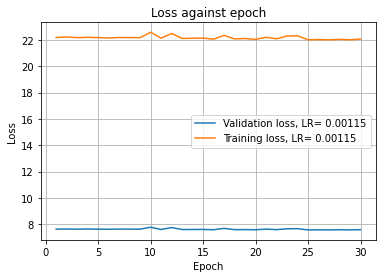

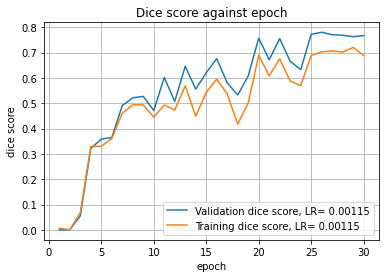

30


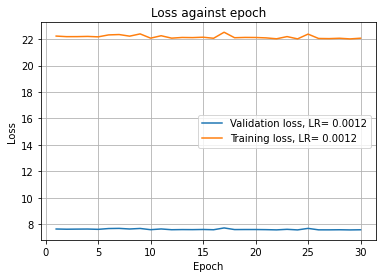

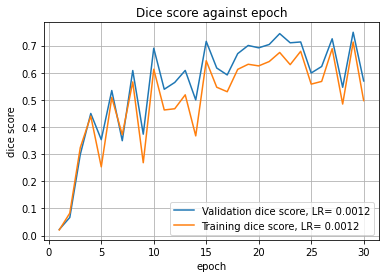

30


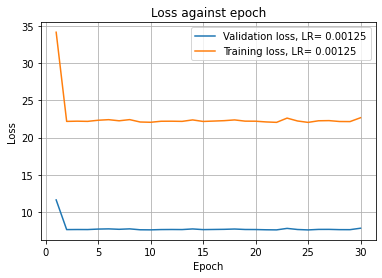

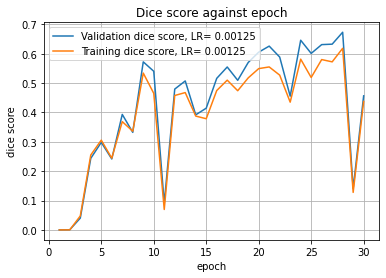

30


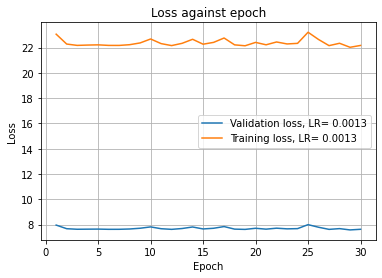

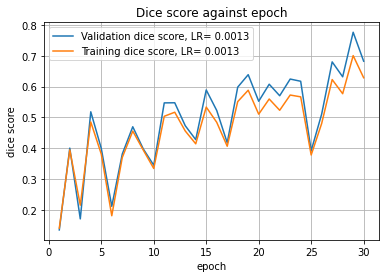

30


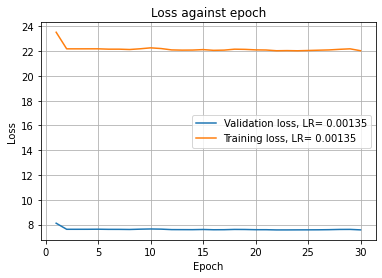

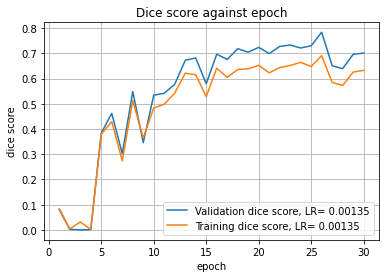

30


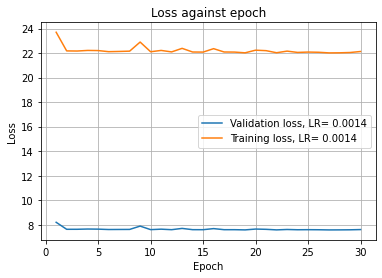

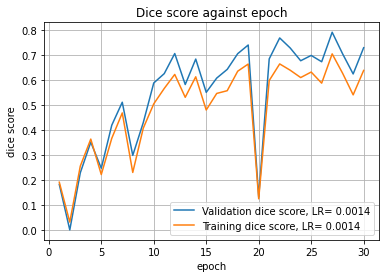

30


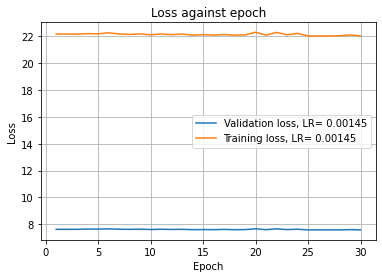

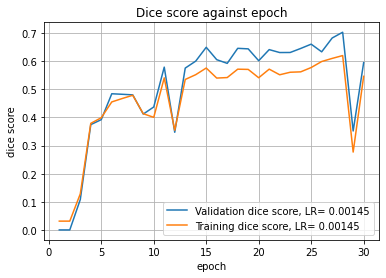

30


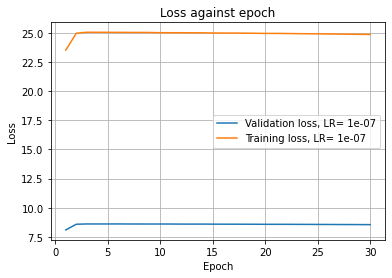

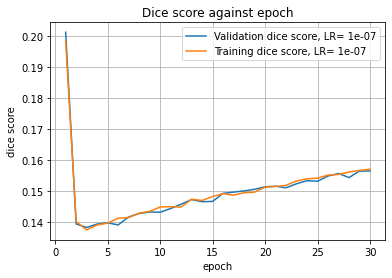

30


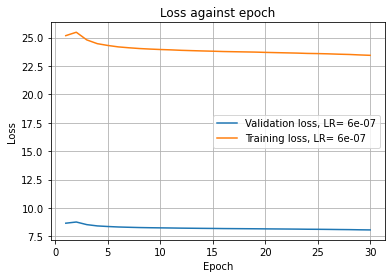

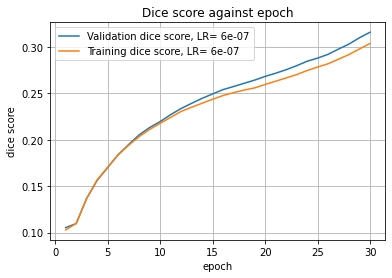

30


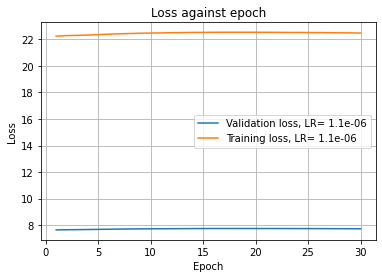

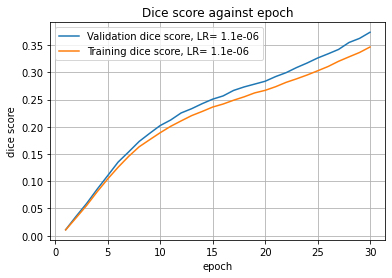

30


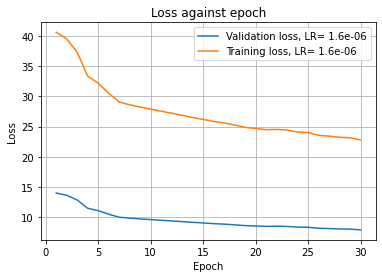

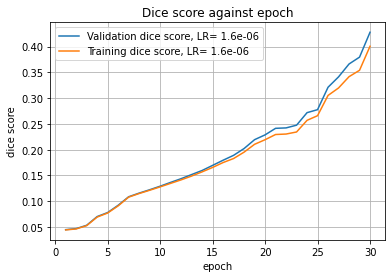

30


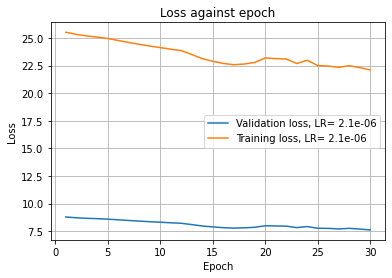

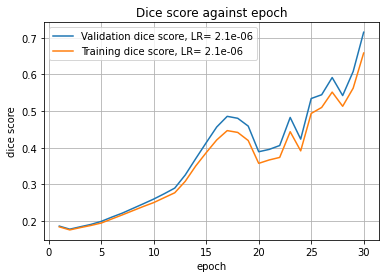

30


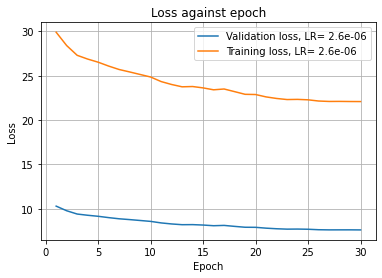

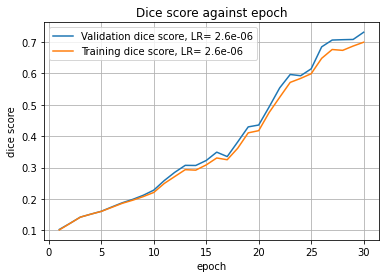

30


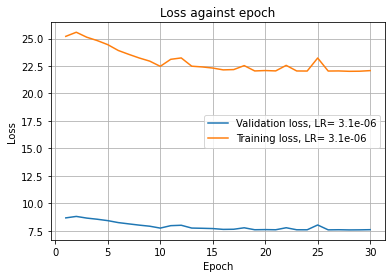

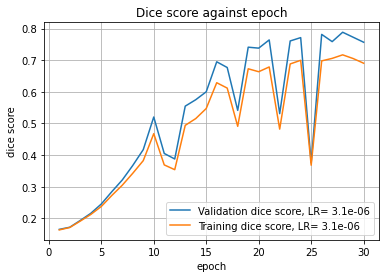

30


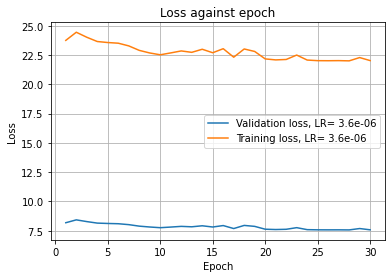

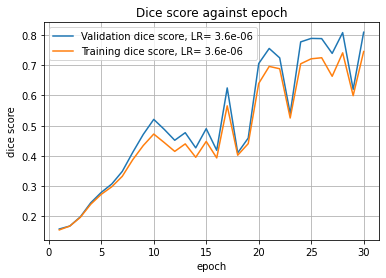

30


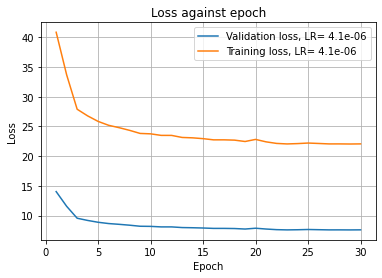

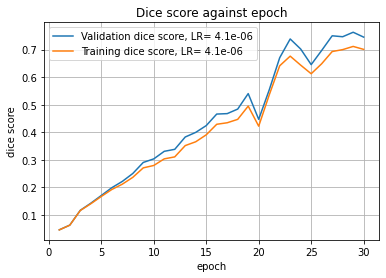

30


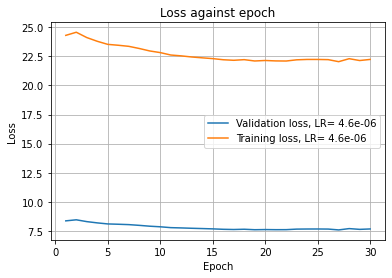

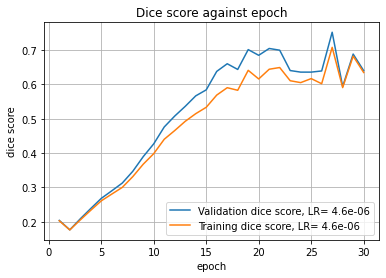

30


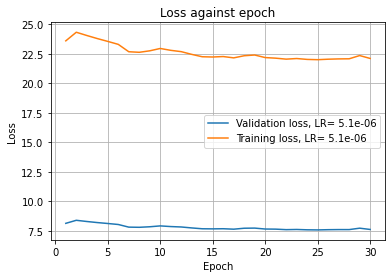

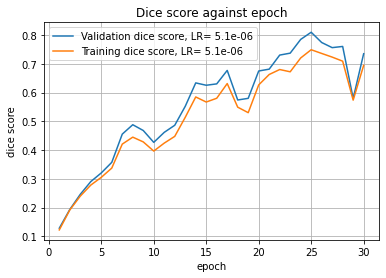

30


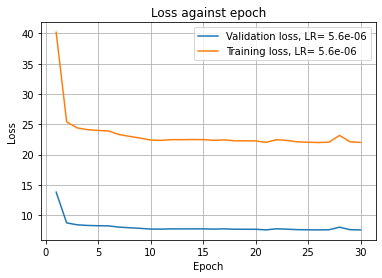

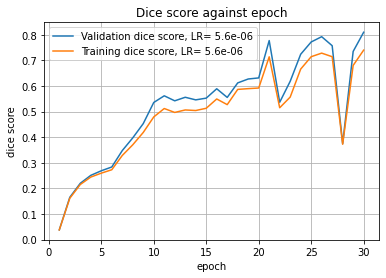

30


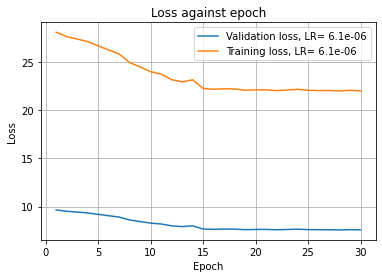

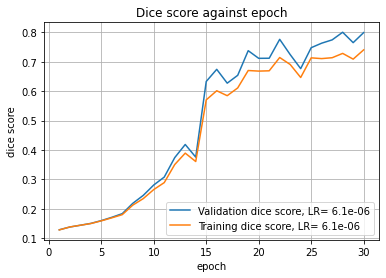

30


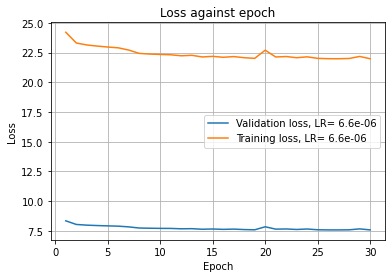

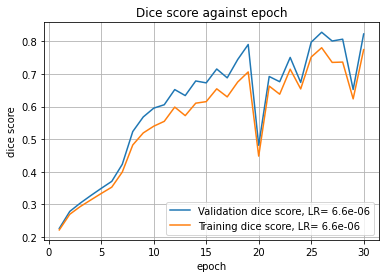

30


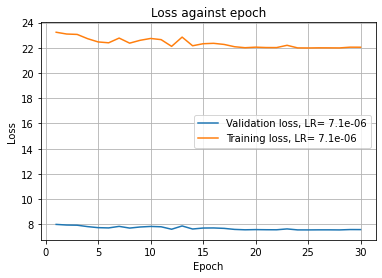

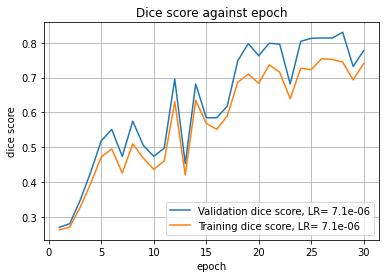

30


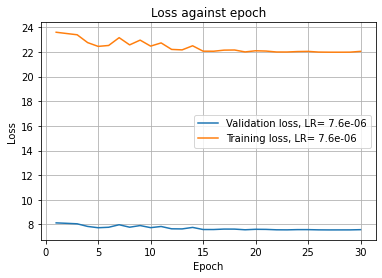

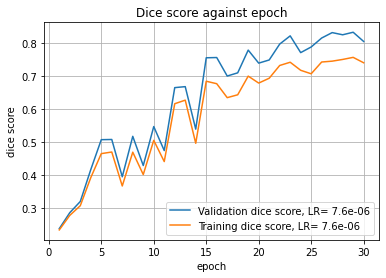

30


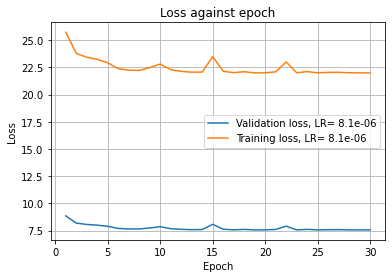

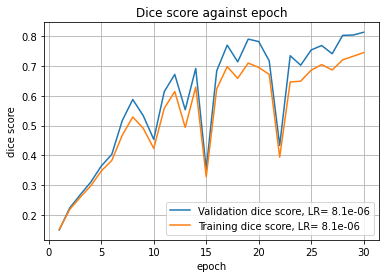

30


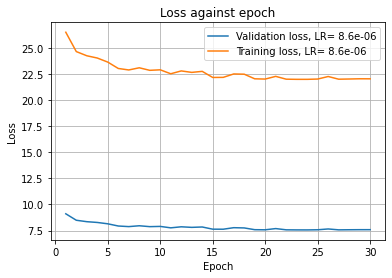

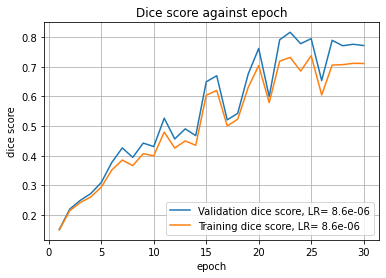

30


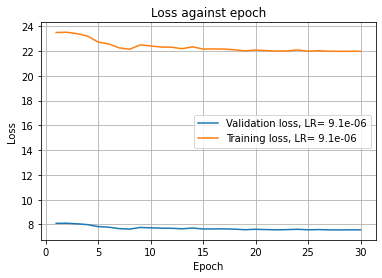

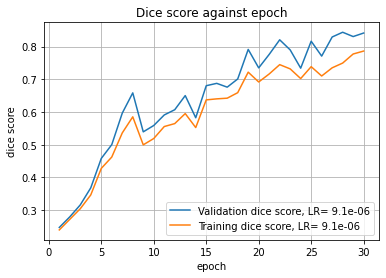

30


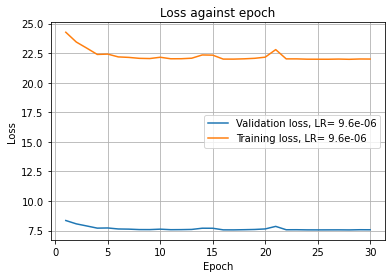

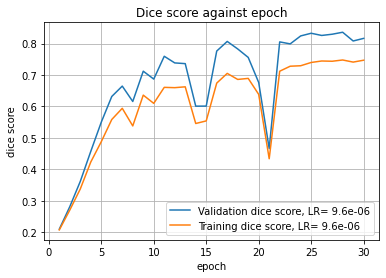

In [10]:
for idx in range(df.shape[0]):
    t_losses = df['Training Loss list'][idx]
    v_losses = df['Validation Loss list'][idx]
    t_dice_scores = df['Training Dice list'][idx]
    v_dice_scores = df['Validation Dice list'][idx]
    
    train_losses = re.findall(r'\d+[.]?\d*[e\-]*\d*', t_losses)
    val_losses = re.findall(r'\d+[.]?\d*[e\-]*\d*', v_losses)
    train_dice_scores = re.findall(r'\d+[.]?\d*[e\-]*\d*', t_dice_scores)
    val_dice_scores = re.findall(r'\d+[.]?\d*[e\-]*\d*', v_dice_scores)
    
    v_loss=[]
    for loss in val_losses:
      v_loss.append(float(loss))
    print(len(v_loss))
    t_loss = []
    for loss in train_losses:
      t_loss.append(float(loss))

    t_dice = []
    for dice in train_dice_scores:
      t_dice.append(float(dice))

    v_dice=[]
    for dice in val_dice_scores:
      v_dice.append(float(dice))

    t = [i for i in range(1,len(v_loss) + 1)]


    fig, ax = plt.subplots()
    vl_label = 'Validation loss, LR= '+ str(df['Learning rate'][idx])
    tl_label = 'Training loss, LR= '+ str(df['Learning rate'][idx])
    ax.plot(t, v_loss, label= vl_label)
    ax.plot(t, t_loss, label= tl_label)

    ax.set(xlabel='Epoch', ylabel='Loss',
           title='Loss against epoch')
    ax.grid()
    plt.legend()
    plt.show()
    
    if not len(t) == len(v_dice):
        print('t: ', t)
        print('v_dice', v_dice)
    fig, ax = plt.subplots()
    vd_label = 'Validation dice score, LR= '+ str(df['Learning rate'][idx])
    ax.plot(t,v_dice, label=vd_label)
    ax.plot(t, t_dice, label='Training dice score, LR= '+ str(df['Learning rate'][idx]))



    ax.set(xlabel='epoch', ylabel='dice score',
           title='Dice score against epoch')
    ax.grid()
    plt.legend()

    plt.show()

In [12]:
tests_dice = df['Test Dice']

In [13]:
t_dice = []
for score in tests_dice:
    score = re.findall(r'\d+[.]?\d*[e\-]*\d*', score)
    t_dice.append(float(score[0]))

In [14]:
len(t_dice)

52

In [15]:
lr_df = df['Learning rate']

In [16]:
lr = []
for mlr in lr_df:
    lr.append(float(mlr))
    

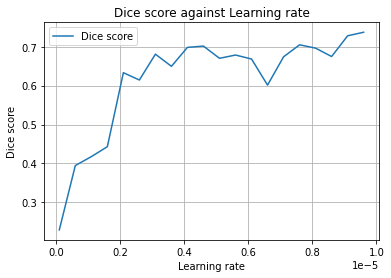

In [23]:
fig, ax = plt.subplots()
    
ax.plot(lr[0:20],t_dice[0:20],label='Dice score')




ax.set(xlabel='Learning rate', ylabel='Dice score',
           title='Dice score against Learning rate')
ax.grid()
plt.legend()

plt.show()

In [20]:
lr[0]

1e-07